<a href="https://colab.research.google.com/github/narendra974/insidedeeplearning/blob/main/PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This* NoteBook illustrates the examples given in chapter 1 of Inside Deep Learning Book.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


Any value of n for an n-dimensional array is still a tensor. The word tensor is simply referring to the overall concept of an n-dimenional array.
We care about the shape of the tensor as we use different shapes to represent different types of data.

In [ ]:
import torch

torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2, 3, 4],
                             [5, 6, 7, 8],
                             [9, 10, 11, 12] 
                            ])
torch_tensor3d = torch.tensor([ 
                               [[1, 2, 3, 4],
                                [5, 6, 7, 8],
                                [9, 10, 11, 12] 
                               ],
                               [[13, 14, 15, 16],
                                [17, 18, 19, 20],
                                [21, 22, 23, 24] 
                               ]
                              ])

print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([3, 4])
torch.Size([2, 3, 4])


Converion of data from numpy to Tensor, Viceversa 
Numpy defaults to 64 bit. Pytorch defaults to 32-bit floats.
But when we create 'PyTorch Tensor' from 'Numpy Array' - Tensor will use same data type as Numpy Array 



In [ ]:
x_np = np.random.random((4, 4))
print(x_np)

[[0.56969565 0.1984825  0.65765361 0.86727773]
 [0.67673301 0.26291193 0.25635154 0.82414743]
 [0.19523588 0.10964661 0.89412823 0.88882459]
 [0.90959793 0.92406643 0.87170953 0.32136247]]


In [ ]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.5697, 0.1985, 0.6577, 0.8673],
        [0.6767, 0.2629, 0.2564, 0.8241],
        [0.1952, 0.1096, 0.8941, 0.8888],
        [0.9096, 0.9241, 0.8717, 0.3214]], dtype=torch.float64)


To avoid issues with the types, you can always specify the data type to be used 'dtype' with the APIS.

In [ ]:
print(x_np.dtype, x_pt.dtype)
x_np = np.asarray(x_pt, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float64 torch.float64
float32 torch.float32


Logical Operations & Similarity of the APIs between Numpy and Tensor.

In [ ]:
b_np = (x_np > 0.5)
b_pt = (x_pt > 0.5)
print(b_np)
print(b_np.dtype)
print(b_pt)
print(b_pt.dtype)

[[ True False  True  True]
 [ True False False  True]
 [False False  True  True]
 [ True  True  True False]]
bool
tensor([[ True, False,  True,  True],
        [ True, False, False,  True],
        [False, False,  True,  True],
        [ True,  True,  True, False]])
torch.bool


Not always API are similar, one such example is transose which is explained as below. Please check always documention about API's functionality.

In [ ]:
np.transpose(x_np)

array([[0.56969565, 0.676733  , 0.19523588, 0.90959793],
       [0.1984825 , 0.26291195, 0.1096466 , 0.9240664 ],
       [0.6576536 , 0.25635153, 0.8941282 , 0.8717095 ],
       [0.86727774, 0.8241474 , 0.8888246 , 0.32136247]], dtype=float32)

In [ ]:
torch.transpose(x_pt, 0, 1)

tensor([[0.5697, 0.6767, 0.1952, 0.9096],
        [0.1985, 0.2629, 0.1096, 0.9241],
        [0.6577, 0.2564, 0.8941, 0.8717],
        [0.8673, 0.8241, 0.8888, 0.3214]])

First important functionality of PyTorch(Tensor) beyond what numpy can provide is to use GPU to accelarate mathematical caluclations. 
Below shows some timings related to CPU and Calculations.

In [ ]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu  = timeit.timeit("x@x", globals=globals(), number=100)

In [ ]:
print("is CUDA available? ",torch.cuda.is_available())
device = torch.device('cuda')

x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)

print(time_cpu)
print(time_gpu)

is CUDA available?  True
24.83950032399997
0.06186710599996559


In [ ]:
def moveTo(obj, device):
  if isinstance(obj, list):
    return [moveTo(x, device) for x in obj]
  elif isinstance(obj, tuple):
    return tuple(moveTo(list(obj), device))
  elif isinstance(obj, set):
    return set(moveTo(list(obj), device))
  elif isinstance(obj, dict):
    to_ret = dect()
    for key, value in obj.items():
      to_ret[moveTo(key, device)] = moveTo(value,device)
  elif hasattr(obj,"to"):
    return obj.to(device)
  else:
    return object
  
some_tensors = [torch.tensor(1), torch.tensor(2)]
device_some_tensors = moveTo(some_tensors, device)
print(some_tensors)
print(device_some_tensors)

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


Second major function of PyTorch is automatic differentiation. As long as we use pytorch provided functions PyTorch can compute gradients automatically.

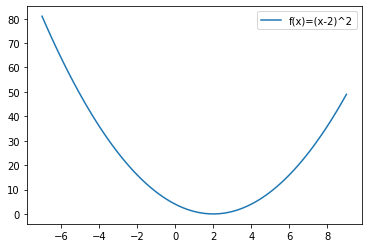

In [ ]:
def f(x):
  return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7, 9, 100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='f(x)=(x-2)^2')


*   STEP1 : Compute the Gradient of F(x)
*   STEP2 : if gradient is positive move 'x' to the left and move to STEP1 
*   STEP3 : if gradient is negative move 'x' to the right and move to STEP1
*   STEP4 : if gradient is zero, STOP

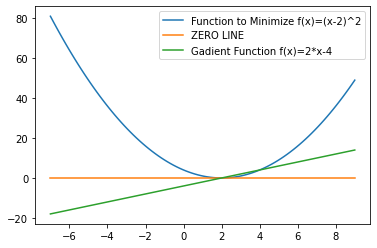

In [ ]:
def fP(x) :
  return 2*x -4

y_axis_values_grad = fP(torch.tensor(x_axis_vals)).numpy()
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='Function to Minimize f(x)=(x-2)^2')
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label='ZERO LINE')
sns.lineplot(x=x_axis_vals, y=y_axis_values_grad, label='Gadient Function f(x)=2*x-4')



*   Calculating Gradient/Differentiation with PyTorch Automatic Differentiation. 
*   To Compute the gradient we have to inform the tensor with the variable 'requires_grad'
*   Tensor maintains a variable called 'grad' to store the gradient. 
*   Once we tell pytorch to calculate the gradients, it will begin to keep track of every computation we do on the tensor for computing the gradient.

In [ ]:
x = torch.tensor([-3.5], requires_grad= True)
print(x.grad)
value = f(x)
print(value)
value.backward()
print(x.grad)

None
tensor([30.2500], grad_fn=<PowBackward0>)
tensor([-11.])


Minimizing a Function with Derivaties.

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100

epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
  x_prev = x_cur.clone()

  value = f(x)
  value.backward()
  x.data -= eta*x.grad
  x.grad.zero_() 
  x_cur = x.data

print(x_cur)

tensor([2.0000])


Optimizing Parameters: 
A parameter of a model is a value that we want to alter using an optimizer, so that we want to reduce the loss function.

In [ ]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=eta)

for epoch in range(60):
  optimizer.zero_grad()
  loss_incurred = f(x_param)
  loss_incurred.backward()
  optimizer.step()
print(x_param.data)

tensor([2.0000])


Dataset Loading.

Pytorch uses  'Dataset' interface to provide efficent loaders that will automatically handle multiple CPU Cores. It encodes information about 
1.   How many items are there in the dataset. 
2.   How to get the N-th element in the dataset.

In [20]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


Sample class extending 'Dataset' class.

In [ ]:
class SimpleDataset(Dataset):
  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X= X;
    self.y=y;